In [93]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.formula.api as smf

## <font color="red">1.1 análisis exploratorio de datos</font>

In [15]:
# Dataset
data = pd.read_excel('./datasets/data_exam1.xlsx', sheet_name='data1')
data.head()

,Y,X,Ind
0,66.199147,12.653765,0
1,44.311301,8.204418,0
2,48.390783,8.768596,0
3,58.087413,16.169568,1
4,60.708671,9.980310,0


Ind
0    800
1    200
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

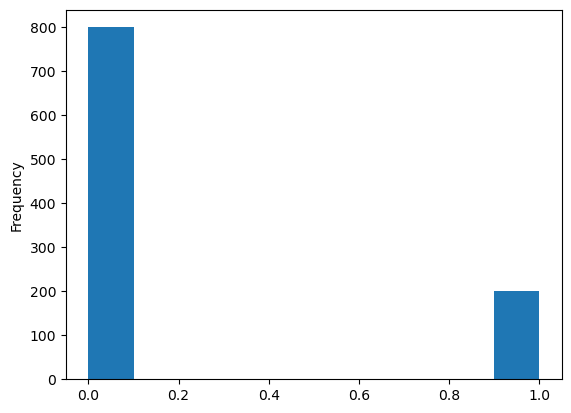

In [16]:
# Categroical data distribution
print(data['Ind'].value_counts())
data['Ind'].plot(kind='hist')

Para la variable categórica Ind:
- 0: 80%
- 1: 20%

In [17]:
# Null values
data.isnull().sum()

Y      0
X      0
Ind    0
dtype: int64

No hay valores nulos

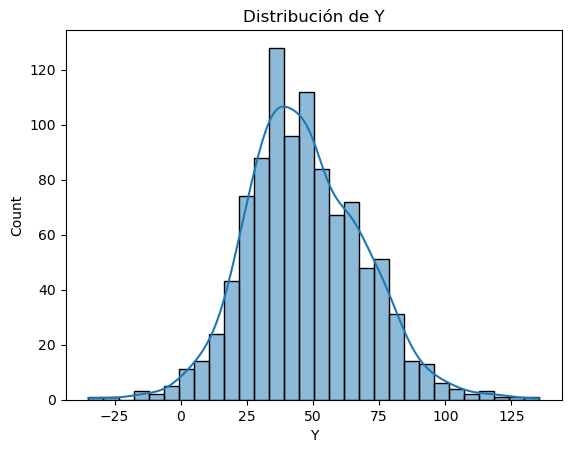

In [18]:
# Y distribution
sns.histplot(data['Y'], kde=True)
plt.title('Distribución de Y')
plt.show()

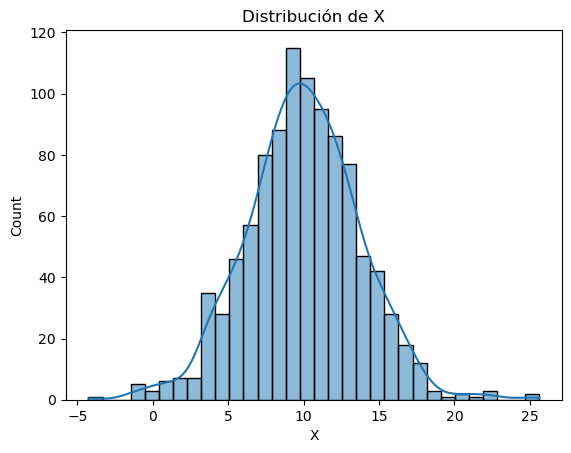

In [19]:
# X distribution
sns.histplot(data['X'], kde=True)
plt.title('Distribución de X')
plt.show()

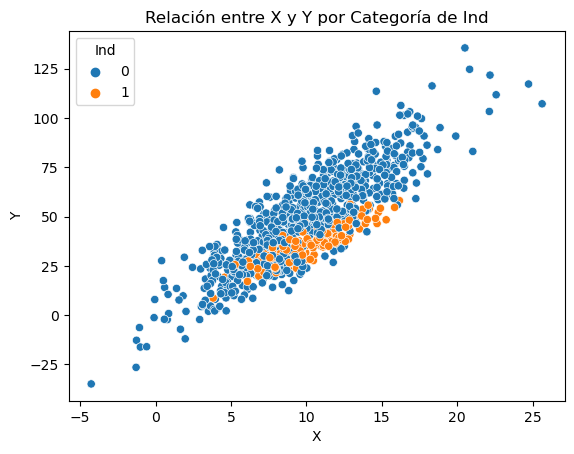

In [20]:
# Relationship between X y Y
sns.scatterplot(data=data, x='X', y='Y', hue='Ind')
plt.title('Relación entre X y Y por Categoría de Ind')
plt.show()

- X y Y siguen una tendencia lineal positiva
- La relación de X y Y por categoría de Ind (0 y 1) es similar, sigue siendo positiva 
- Aunque hay una superposición, parece haber una distinción en la ubicación de los puntos azules y naranjas (una agrupación). Esto puede sugerir que la variable 'Ind' tiene un efecto en la relación entre X y Y.

In [21]:
# Pearsons correlation between X and Y
print('Pearson')
print(data[['X', 'Y']].corr(), '\n ======================')

# Spearman correlation
print('Spearmans')
print(data[['X', 'Y']].corr(method='spearman'), '\n ======================')

# Kendall correlation
print('Kenall')
print(data[['X', 'Y']].corr(method='kendall'), '\n ======================')


Pearson
          X         Y
X  1.000000  0.832057
Y  0.832057  1.000000 
Spearmans
          X         Y
X  1.000000  0.803893
Y  0.803893  1.000000 
Kenall
          X         Y
X  1.000000  0.610515
Y  0.610515  1.000000 


- Existe una correlación positiva fuerte entre X y Y

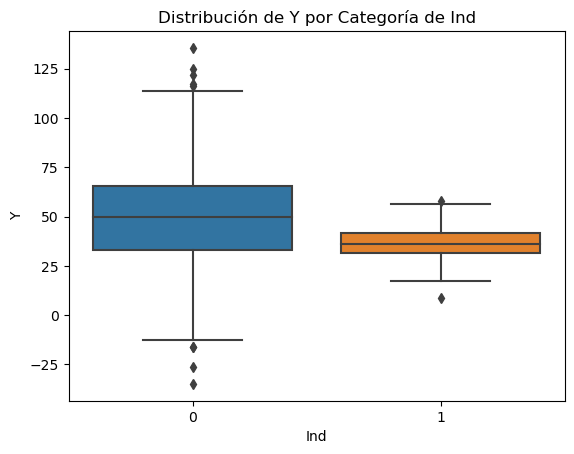

In [22]:
sns.boxplot(data=data, x='Ind', y='Y')
plt.title('Distribución de Y por Categoría de Ind')
plt.show()

### Distribución de los valores de la variable Y para cada una de las categorías de la variable categórica Ind (0 y 1)
- La mediana de la categoría 0 parece ser más alta que la de la categoría 1, lo que sugiere que los valores de Y tienden a ser más altos cuando Ind es 0.
- La categoría 0 tiene un IQR más amplio que la categoría 1, lo que indica una mayor variabilidad en los valores de Y cuando Ind es 0.
- Ambas categorías presentan valores atípicos, lo que indica la presencia de algunos valores de Y que son inusualmente altos o bajos en comparación con el resto de los datos.
- La categoría 0 tiene un rango de datos más amplio en comparación con la categoría 1, sugiriendo que los valores de Y para Ind = 0 varían más que para Ind = 1.

---

### Justificación:
Según la información presentada en el análisis exploratorio sugiere que un modelo de regresión lineal podría ser adecuado para modelar la relación entre X y Y.
Basado en la correlación significativa entre X y Y, y asumiendo que la variable Ind también podría influir en Y, sí consideramos posible generar un modelo de regresión lineal para Y incluyendo a Ind como una variable categórica sin interacción. Esto es posible dado a la fuerte correlación entre X e Y,lo que sugiere una influencia significativa de X en Y.La inclusión de Ind permite evaluar los cambios en el nivel base de Y entre diferentes categorías. Este enfoque mantiene la simplicidad del modelo y la claridad en la interpretación, explorando posibles diferencias entre categorías en una etapa preliminar.

## Modelo de regresión lineal

In [76]:
X = data[['X', 'Ind']]
y = data['Y']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

print(f'Coeficiente para X: {model.coef_}')
print(f'Intercepto: {model.intercept_}')
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

Mean Squared Error: 129.64107867616934
R-squared: 0.7234563078306546
Coeficiente para X: [  4.85906895 -13.9195904 ]
Intercepto: 1.047830891164601


,Coeff
X,4.859069
Ind,-13.919590


In [94]:
model = smf.ols('Y ~ X + C(Ind)', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          2.25e-308
Time:                        17:55:14   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7873      0.984      0.800      

In [ ]:
# Filtrar los datos para Ind = 0
data_0 = data[data['Ind'] == 0]
X_0 = data_0[['X']]
y_0 = data_0['Y']
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.2, random_state=42)

# Modelo para Ind = 0
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train_0)
y_pred_0 = model_0.predict(X_test_0)
mse_0 = mean_squared_error(y_test_0, y_pred_0)
r2_0 = r2_score(y_test_0, y_pred_0)

# Filtrar los datos para Ind = 1
data_1 = data[data['Ind'] == 1]
X_1 = data_1[['X']]
y_1 = data_1['Y']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# Modelo para Ind = 1
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)
y_pred_1 = model_1.predict(X_test_1)
mse_1 = mean_squared_error(y_test_1, y_pred_1)
r2_1 = r2_score(y_test_1, y_pred_1)

# Mostrar los resultados
print("Resultados para Ind = 0")
print(f"Mean Squared Error: {mse_0}")
print(f"R^2: {r2_0}\n")

print("Resultados para Ind = 1")
print(f"Mean Squared Error: {mse_1}")
print(f"R^2: {r2_1}")


Resultados para Ind = 0
Mean Squared Error: 152.7043081291725
R^2: 0.7410188685476828

Resultados para Ind = 1
Mean Squared Error: 16.108885079999645
R^2: 0.7388668017678104


/Users/danielmartinezvillegas/anaconda3/envs/personal/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/danielmartinezvillegas/anaconda3/envs/personal/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


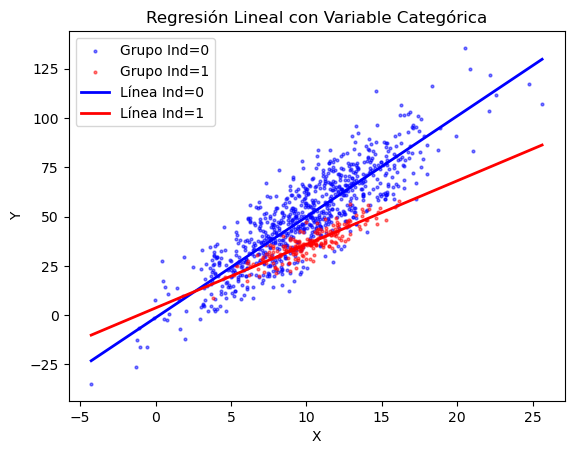

In [ ]:
x_min, x_max = data['X'].min(), data['X'].max()
x_values = np.linspace(x_min, x_max, 100)

y_pred_0_line = model_0.predict(x_values.reshape(-1, 1))
y_pred_1_line = model_1.predict(x_values.reshape(-1, 1))

plt.scatter(data_0['X'], y_0, color='blue', label='Grupo Ind=0', alpha=0.5, s=4)
plt.scatter(data_1['X'], y_1, color='red', label='Grupo Ind=1', alpha=0.5, s=4)

plt.plot(x_values, y_pred_0_line, color='blue', linewidth=2, label='Línea Ind=0')
plt.plot(x_values, y_pred_1_line, color='red', linewidth=2, label='Línea Ind=1')

# Añadir etiquetas y leyenda
plt.title('Regresión Lineal con Variable Categórica')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Análisis